In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import os
from google.colab import drive
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.layers import Conv2D, MaxPooling2D, LSTM, Dense, Reshape, Flatten, Dropout
import tensorflow as tf

In [ ]:
def get_data(filePath):
  with open(filePath) as csv_file:
    array = np.loadtxt(csv_file, delimiter = ",")
  x = [i[0] for i in array]
  y1 = [i[1] for i in array]
  y2 = [i[2] for i in array]
  y3 = [i[3] for i in array]
  y4 = [i[4] for i in array]
  y5 = [i[5] for i in array]
  r = (len(x)+1)/6
  #x_t = x[:int(r)]
  i = 0
  y1_t = []
  y2_t = []
  y3_t = []
  y4_t = []
  y5_t = []
  while(i < len(x)):
    if (i==0): # ตัด 399 ตัวแรก
      y1_t.append(y1[int(i):int(i+r-1)])
      y2_t.append(y2[int(i):int(i+r-1)])
      y3_t.append(y3[int(i):int(i+r-1)])
      y4_t.append(y4[int(i):int(i+r-1)])
      y5_t.append(y5[int(i):int(i+r-1)])
      i+=(r-1)
    else: # ตัดทีละ 400 ตัว ในแต่ละ Temp
      y1_t.append(y1[int(i):int(i+r)])
      y2_t.append(y2[int(i):int(i+r)])
      y3_t.append(y3[int(i):int(i+r)])
      y4_t.append(y4[int(i):int(i+r)])
      y5_t.append(y5[int(i):int(i+r)])
      i+=r
  # print(len(y1_t))
  y1_t = y1_t[1:]
  y2_t = y2_t[1:]
  y3_t = y3_t[1:]
  y4_t = y4_t[1:]
  y5_t = y5_t[1:]
  # print(len(y1_t))

  return [y1_t, y2_t, y3_t, y4_t, y5_t]

In [ ]:
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
path_B1 = 'file_path'
fNameCn_1 = os.listdir(path_B1)
path_N1 = 'file_path'
fNameNm_1 = os.listdir(path_N1)
print(len(fNameCn_1) , ",", len(fNameNm_1))

358 , 280


In [ ]:
cy_list_ = []
for fN in fNameCn_1:
  cy_list_.append(get_data(path_B1 + fN))

ny_list_ = []
for fN in fNameNm_1:
  ny_list_.append(get_data(path_N1 + fN))

In [ ]:
cy = int(len(cy_list_)*0.9)
ny = int(len(ny_list_)*0.9)

cy_list = cy_list_[:cy]
cy_test = cy_list_[cy:]

ny_list = ny_list_[:ny]
ny_test = ny_list_[ny:]

In [ ]:
def plot_imp(y,s, folder_name):
  pllt = ['r','g','b','c','m','orange']
  ax = 0
  fig, axs = plt.subplots(1,5,figsize=(45, 7))
  fig.suptitle(s,fontsize=20)
  for ysub in y:
    i = 0
    for yy in ysub:
      axs[ax].plot(range(len(yy)),yy,pllt[i])
      i+=1
    plt.savefig("file_path"+folder_name+"/"+"img"+str(s)+"_"+str(i)+'.jpg')
    ax+=1

In [ ]:
def Average(lst):
    return sum(lst) / len(lst)

def Average_p(x,r):
  output = []
  for i in range(r,len(x)-r):
    output.append(Average(x[(i-r):(i+r)]))
  return output

In [ ]:
def average_data(input,avr):
  output = []
  for row in input:
    otemp = []
    for sensor in row:
      otemp_sensor = []
      for termal in sensor:
        otemp_sensor.append(Average_p(termal,avr))
      otemp.append(otemp_sensor)
    output.append(otemp)
  return output

In [ ]:
avr_r = 15
avg_ny_list = average_data(ny_list,avr_r)
avg_cy_list = average_data(cy_list,avr_r)

In [ ]:
print("Before Average Data :", len(cy_list[0][0][0]))
print("After Average Data :",len(avg_cy_list[0][0][0]))
print(len(avg_ny_list[0]))
print(len(avg_ny_list[0][0]))
print(len(avg_ny_list))

Before Average Data : 400
After Average Data : 370
5
5
252


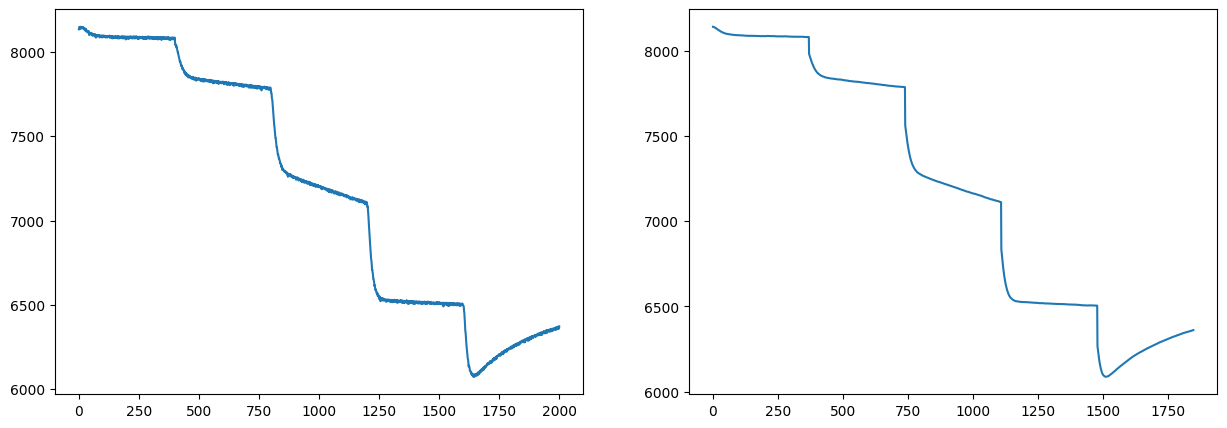

In [ ]:
nsample_1 = ny_list[0][0][0] + ny_list[0][0][1] +ny_list[0][0][2] +ny_list[0][0][3] + ny_list[0][0][4]
nsample_2 = avg_ny_list[0][0][0] + avg_ny_list[0][0][1] + avg_ny_list[0][0][2] + avg_ny_list[0][0][3] + avg_ny_list[0][0][4]

fig, axis = plt.subplots(1, 2, figsize=(15, 5))
axis[0].plot(nsample_1)
axis[1].plot(nsample_2)

In [ ]:
def StandardNorm(data_inp):
  data_shape = np.array(data_inp).shape
  reshaped_data = np.array(data_inp).reshape((-1, data_shape[-1]))
  # print(reshaped_data.shape)
  mean = np.mean(reshaped_data, axis=0)
  std = np.std(reshaped_data, axis=0)

  normalized_data = (reshaped_data - mean) / std
  normalized_data = normalized_data.reshape(data_shape)
  return normalized_data

avg_cy_list_norm = StandardNorm(avg_cy_list)
avg_ny_list_norm = StandardNorm(avg_ny_list)

In [ ]:
x = np.array(avg_cy_list)

for i in range(x.shape[0]):
  print(np.mean(x[i][0]))
  print(np.mean(x[i][1]))
  print(np.mean(x[i][2]))
  print(np.mean(x[i][3]))
  print(np.mean(x[i][4]))
  print("--------")

In [ ]:
print(len(avg_ny_list_norm))
print(len(avg_ny_list_norm[0]))
print(len(avg_ny_list_norm[0][0]))
print(len(avg_ny_list_norm[0][0][0]))

252
5
5
370


In [ ]:
def normalizer(data_inp):
  data = []
  data_inp = np.array(data_inp)
  for n in range(data_inp.shape[0]):
    sensor_list = []
    for sensor in data_inp[n]:
      temp_list = []
      for temp in sensor:
        data_shape = np.array(sensor).shape

        reshaped_data = np.array(sensor).reshape((-1))

        mean = np.mean(reshaped_data, axis=0)
        std = np.std(reshaped_data, axis=0)

        normalized_data = (reshaped_data - mean) / std
        normalized_data = normalized_data.reshape(data_shape)
        sensor_list.append(normalized_data)
      temp_list.append(sensor_list)
    data.append(temp_list)
  return np.array(data)

avg_cy_list_norm = normalizer(avg_cy_list)
avg_ny_list_norm = normalizer(avg_ny_list)

In [ ]:
def normalizer(data_inp):
  data = []
  data_inp = np.array(data_inp)
  for n in range(data_inp.shape[0]):
    sensor_list = []
    for sensor in data_inp[n]:
      data_shape = np.array(sensor).shape

      reshaped_data = np.array(sensor).reshape((-1))

      mean = np.mean(reshaped_data, axis=0)
      std = np.std(reshaped_data, axis=0)

      normalized_data = (reshaped_data - mean) / std
      normalized_data = normalized_data.reshape(data_shape)
      sensor_list.append(normalized_data)
    data.append(sensor_list)
  return np.array(data)

avg_cy_list_norm = normalizer(avg_cy_list)
avg_ny_list_norm = normalizer(avg_ny_list)

In [ ]:
print(avg_cy_list_norm.shape)
print(avg_ny_list_norm.shape)
# print(avg_ny_list_norm[0][0][0])

(322, 5, 5, 370)
(252, 5, 5, 370)


In [ ]:
allData = np.concatenate((avg_cy_list_norm,avg_ny_list_norm), axis=0)
print(allData.shape)

(574, 5, 5, 370)


In [ ]:
label = [] #0: Normal, 1: Cancer
for i in range(len(avg_ny_list_norm)):
    label.append(0)

for j in range(len(avg_cy_list_norm)):
    label.append(1)

In [ ]:
import tensorflow as tf
from keras import layers, models
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

to nn

In [ ]:
def prepareData(allData):
    temp0 = []
    for i in range(len(allData)):
        temp1 = []
        for j in range(len(allData[i])):
            temp2 = []
            for k in range(len(allData[i][j])):
                temp3 = []
                for l in range(len(allData[i][j][k])):
                    temp3.append(np.array(allData[i][j][k][l]).flatten().tolist())
                temp2.append(np.array(temp3).flatten().tolist())
            temp1.append(np.array(temp2).flatten())
        temp0.append(np.array(temp1).flatten())
    return temp0

data = prepareData(allData)
print(len(data))
print(len(data[0]))

574
9250


to cnn

In [ ]:
def prepareData(allData):
    temp0 = []
    for i in range(len(allData)):
        temp1 = []
        for j in range(len(allData[i])):
            temp2 = []
            for k in range(len(allData[i][j])):
                temp3 = []
                for l in range(len(allData[i][j][k])):
                    temp3.append(np.array(allData[i][j][k][l]).flatten().tolist())
                temp2.append(np.array(temp3).flatten().tolist())
            temp1.append(temp2)
        temp0.append(temp1)
    return temp0

data = prepareData(allData)
print(len(data))
print(len(data[0]))
print(len(data[0][0]))
print(len(data[0][0][4]))

574
5
5
370


In [ ]:
data = np.array(data)
# for i in range(len(data)):
#   data[i].reshape(data.shape[1], 1)

In [ ]:
data_T = np.transpose(data, (0, 3, 1, 2))

In [ ]:
data_T.shape

(574, 370, 5, 5)

In [ ]:
data_T_reshape = data_T.reshape(638, 5, 5, 370, 1)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(data, label, test_size=0.2)
X_train = np.array(X_train)
X_test = np.array(X_test)
y_train = np.array(y_train)
y_test = np.array(y_test)

print(X_train.shape)

(459, 5, 5, 370)


In [ ]:
y_train = np.array(y_train)
y_test = np.array(y_test)

In [ ]:
X_train = X_train.reshape(X_train.shape[0], 1, 9250)
X_test = X_test.reshape(X_test.shape[0], 1, 9250)
y_train = y_train.reshape(y_train.shape[0], 1)
y_test = y_test.reshape(y_test.shape[0], 1)

print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(459, 1, 9250) (115, 1, 9250) (459, 1) (115, 1)


From book

In [ ]:
l = 30
m = 3
n = 5

N = data.shape[0]
k = N - (l + m + n)

in_slide = np.array([range(i, i+l) for i in range(k)])
op_slice = np.array([range(i + l + m, i + l + m + n) for i in range(k)])

in_data = data[in_slide,:]
print(in_data.shape)
out_data = data[op_slice,:]
print(out_data.shape)

(600, 30, 9250)
(600, 5, 9250)


In [ ]:
model = tf.keras.Sequential()
model.add(tf.keras.layers.LSTM(128, input_shape=(1, 9250), activation="tanh", return_sequences=True))
model.add(tf.keras.layers.LSTM(128, activation="tanh", return_sequences=True))
model.add(tf.keras.layers.LSTM(128, activation="tanh"))
model.add(tf.keras.layers.Dense(1))

model.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])
model.summary()

In [ ]:
print(X_train.shape)

(574, 5, 5, 370, 1)


In [ ]:
import tensorflow as tf

ann = tf.keras.models.Sequential()

ann.add(tf.keras.layers.Conv3D(32, (3, 3, 3), activation='relu', input_shape=(5, 5, 370, 1)))
ann.add(tf.keras.layers.MaxPooling3D((2, 2, 2)))
ann.add(tf.keras.layers.Flatten())

time_steps = 1
features = 5888
ann.add(tf.keras.layers.Reshape((time_steps, features)))

ann.add(tf.keras.layers.LSTM(100, input_shape=(time_steps, features)))
# ann.add(tf.keras.layers.Dense(units=256, activation='sigmoid'))
# ann.add(tf.keras.layers.Dropout(0.1))
ann.add(tf.keras.layers.Dense(units=128, activation='sigmoid'))
ann.add(tf.keras.layers.Dropout(0.5))
ann.add(tf.keras.layers.Dense(units=64, activation='sigmoid'))
ann.add(tf.keras.layers.Dropout(0.5))
ann.add(tf.keras.layers.Dense(units=32, activation='sigmoid'))
ann.add(tf.keras.layers.Dropout(0.5))
ann.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))

# ann.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
# ann.summary()

In [ ]:
import tensorflow as tf

ann = tf.keras.models.Sequential()

ann.add(tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(5, 5, 370)))
ann.add(tf.keras.layers.MaxPooling2D((2, 2)))
ann.add(tf.keras.layers.Flatten())

time_steps = 1
features = 32
ann.add(tf.keras.layers.Reshape((time_steps, features)))

ann.add(tf.keras.layers.LSTM(100, input_shape=(time_steps, features)))
# ann.add(tf.keras.layers.Dense(units=256, activation='sigmoid'))
# # ann.add(tf.keras.layers.Dropout(0.1))
ann.add(tf.keras.layers.Dense(units=128, activation='sigmoid'))
ann.add(tf.keras.layers.Dropout(0.3))
ann.add(tf.keras.layers.Dense(units=64, activation='sigmoid'))
ann.add(tf.keras.layers.Dropout(0.3))
ann.add(tf.keras.layers.Dense(units=32, activation='sigmoid'))
ann.add(tf.keras.layers.Dropout(0.5))
ann.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))

# ann.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
# ann.summary()

In [ ]:
callback = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=3)
ann.compile(optimizer = tf.keras.optimizers.Adam(learning_rate=0.001), loss = 'BinaryCrossentropy', metrics = ['accuracy'])
history = ann.fit(X_train, y_train, batch_size = 4 ,callbacks = [callback], epochs = 100, validation_data=(X_test, y_test))

Epoch 1/100
115/115 [==============================] - 4s 10ms/step - loss: 0.7420 - accuracy: 0.4880 - val_loss: 0.6898 - val_accuracy: 0.5739
Epoch 2/100
115/115 [==============================] - 1s 6ms/step - loss: 0.6944 - accuracy: 0.5643 - val_loss: 0.6460 - val_accuracy: 0.7130
Epoch 3/100
115/115 [==============================] - 1s 7ms/step - loss: 0.6644 - accuracy: 0.6209 - val_loss: 0.5819 - val_accuracy: 0.7304
Epoch 4/100
115/115 [==============================] - 1s 7ms/step - loss: 0.6403 - accuracy: 0.6471 - val_loss: 0.5578 - val_accuracy: 0.7130
Epoch 5/100
115/115 [==============================] - 1s 9ms/step - loss: 0.6055 - accuracy: 0.6710 - val_loss: 0.5587 - val_accuracy: 0.6783
Epoch 6/100
115/115 [==============================] - 1s 9ms/step - loss: 0.6052 - accuracy: 0.6754 - val_loss: 0.5246 - val_accuracy: 0.7391
Epoch 7/100
115/115 [==============================] - 1s 11ms/step - loss: 0.5637 - accuracy: 0.7102 - val_loss: 0.5104 - val_accuracy: 0.73

In [ ]:
history = ann.fit(X_train, y_train, epochs=10, batch_size=4, validation_data=[X_test, y_test])

In [ ]:
ann = tf.keras.Sequential(
[
  Conv2D(32, (3, 3), activation='relu', input_shape=(370, 5, 5)),
  MaxPooling2D(2, 2),

  Flatten(),

  Reshape((1, 5888)),

  LSTM(100, input_shape=(1, 32)),
  # Dropout(0.3),

  Dense(units=128, activation='sigmoid'),
  Dropout(0.3),

  Dense(units=64, activation='sigmoid'),
  Dropout(0.3),
  Dense(units=32, activation='sigmoid'),
  Dropout(0.5),
  Dense(units=1, activation='sigmoid')
]
)

callback = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=3)
ann.compile(optimizer = tf.keras.optimizers.Adam(learning_rate=0.001), loss = 'BinaryCrossentropy', metrics = ['accuracy'])
history = ann.fit(X_train, y_train, batch_size = 4 ,callbacks = [callback], epochs = 100, validation_data=(X_test, y_test))

Epoch 1/100
115/115 [==============================] - 8s 12ms/step - loss: 0.7628 - accuracy: 0.5054 - val_loss: 0.6687 - val_accuracy: 0.6000
Epoch 2/100
115/115 [==============================] - 1s 9ms/step - loss: 0.6992 - accuracy: 0.5599 - val_loss: 0.6117 - val_accuracy: 0.6957
Epoch 3/100
115/115 [==============================] - 1s 9ms/step - loss: 0.6272 - accuracy: 0.6362 - val_loss: 0.5963 - val_accuracy: 0.6783
Epoch 4/100
115/115 [==============================] - 2s 15ms/step - loss: 0.5891 - accuracy: 0.6885 - val_loss: 0.5645 - val_accuracy: 0.6522
Epoch 5/100
115/115 [==============================] - 1s 12ms/step - loss: 0.5381 - accuracy: 0.7255 - val_loss: 0.5438 - val_accuracy: 0.7391
Epoch 6/100
115/115 [==============================] - 1s 12ms/step - loss: 0.4816 - accuracy: 0.7865 - val_loss: 0.5020 - val_accuracy: 0.7130
Epoch 7/100
115/115 [==============================] - 1s 8ms/step - loss: 0.4725 - accuracy: 0.7712 - val_loss: 0.4194 - val_accuracy: 0.

Transfer learning


In [ ]:
ann2 = ann
ann2.layers[0].trainable = False
# ann2.layers[1].trainable = False
# # ann2.layers[4].trainable = False
# ann2.layers[5].trainable = False


# ann2.compile(optimizer = tf.keras.optimizers.Adam(learning_rate=0.001), loss = 'BinaryCrossentropy', metrics = ['accuracy'])
# history = ann2.fit(X_train_, y_train_, epochs=30, batch_size=4, validation_data=[X_test_, y_test_])
callback = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=3)
ann2.compile(optimizer = tf.keras.optimizers.Adam(learning_rate=0.001), loss = 'BinaryCrossentropy', metrics = ['accuracy'])
history = ann2.fit(X_train_, y_train_, batch_size = 4 ,callbacks = [callback], epochs = 100, validation_data=(X_test_, y_test_))

Epoch 1/100
122/122 [==============================] - 5s 10ms/step - loss: 0.7245 - accuracy: 0.4497 - val_loss: 0.7001 - val_accuracy: 0.4182
Epoch 2/100
122/122 [==============================] - 1s 7ms/step - loss: 0.7036 - accuracy: 0.4784 - val_loss: 0.7005 - val_accuracy: 0.4182
Epoch 3/100
122/122 [==============================] - 1s 8ms/step - loss: 0.6965 - accuracy: 0.5072 - val_loss: 0.6998 - val_accuracy: 0.4182
Epoch 4/100
122/122 [==============================] - 1s 8ms/step - loss: 0.7001 - accuracy: 0.5359 - val_loss: 0.7001 - val_accuracy: 0.4182
Epoch 5/100
122/122 [==============================] - 1s 8ms/step - loss: 0.6919 - accuracy: 0.5318 - val_loss: 0.7000 - val_accuracy: 0.4182
Epoch 6/100
122/122 [==============================] - 1s 9ms/step - loss: 0.6977 - accuracy: 0.5051 - val_loss: 0.7030 - val_accuracy: 0.4182
Epoch 7/100
122/122 [==============================] - 1s 8ms/step - loss: 0.6975 - accuracy: 0.4867 - val_loss: 0.7039 - val_accuracy: 0.418

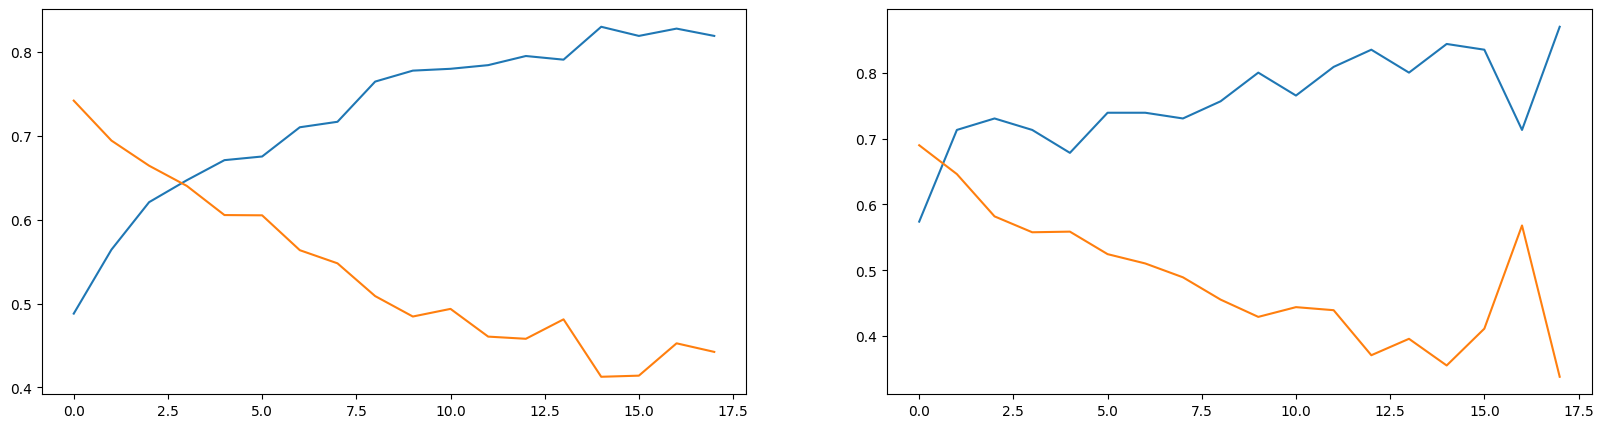

In [ ]:
fig, axis = plt.subplots(1, 2, figsize=(20,5))

axis[0].plot(history.history['accuracy'])
axis[0].plot(history.history['loss'])

axis[1].plot(history.history['val_accuracy'])
axis[1].plot(history.history['val_loss'])

In [ ]:
from sklearn.metrics import precision_recall_curve
from numpy import argmax

preds = ann.predict(X_test)       #อย่าลืมเปลี่ยนชื่อ model

precision, recall, thresholds = precision_recall_curve(y_test, preds)


fscore = (2 * precision * recall) / (precision + recall)

ix = argmax(fscore)
print('Best Threshold=%f, F-Score=%.3f' % (thresholds[ix], fscore[ix]))

4/4 [==============================] - 1s 5ms/step
Best Threshold=0.741540, F-Score=0.900


In [ ]:
y_pred_test = ann.predict(X_test)        #อย่าลืมเปลี่ยนชื่อ model
y_pred_test = (y_pred_test > thresholds[ix])

# y_pred_val = ann.predict(X_validation)
# y_pred_val = (y_pred_val > 0.698066)

4/4 [==============================] - 0s 8ms/step


In [ ]:
cm = confusion_matrix(y_test, y_pred_test)
print(cm)
print("Accuracy: ", accuracy_score(y_test, y_pred_test))
print("Precision: ", precision_score(y_test, y_pred_test))
print("Recall: ", recall_score(y_test, y_pred_test))

[[38  7]
 [ 8 62]]
Accuracy:  0.8695652173913043
Precision:  0.8985507246376812
Recall:  0.8857142857142857


<Axes: >

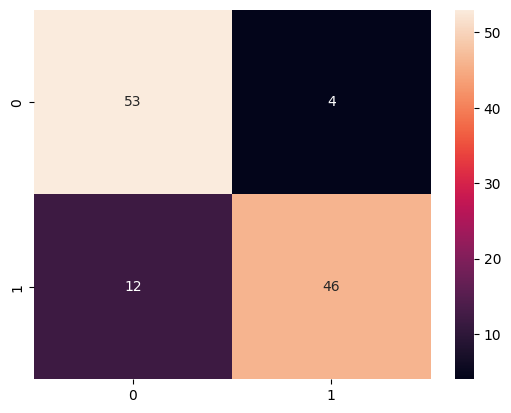

In [ ]:
sns.heatmap(cm, annot = True)

##Test

In [ ]:
def get_data(filePath):
  with open(filePath) as csv_file:
    array = np.loadtxt(csv_file, delimiter = ",")
  x = [i[0] for i in array]
  y1 = [i[1] for i in array]
  y2 = [i[2] for i in array]
  y3 = [i[3] for i in array]
  y4 = [i[4] for i in array]
  y5 = [i[5] for i in array]
  r = (len(x)+1)/6
  #x_t = x[:int(r)]
  i = 0
  y1_t = []
  y2_t = []
  y3_t = []
  y4_t = []
  y5_t = []
  while(i < len(x)):
    if (i==0): # ตัด 399 ตัวแรก
      y1_t.append(y1[int(i):int(i+r-1)])
      y2_t.append(y2[int(i):int(i+r-1)])
      y3_t.append(y3[int(i):int(i+r-1)])
      y4_t.append(y4[int(i):int(i+r-1)])
      y5_t.append(y5[int(i):int(i+r-1)])
      i+=(r-1)
    else: # ตัดทีละ 400 ตัว ในแต่ละ Temp
      y1_t.append(y1[int(i):int(i+r)])
      y2_t.append(y2[int(i):int(i+r)])
      y3_t.append(y3[int(i):int(i+r)])
      y4_t.append(y4[int(i):int(i+r)])
      y5_t.append(y5[int(i):int(i+r)])
      i+=r
  # print(len(y1_t))
  y1_t = y1_t[1:]
  y2_t = y2_t[1:]
  y3_t = y3_t[1:]
  y4_t = y4_t[1:]
  y5_t = y5_t[1:]
  # print(len(y1_t))

  return [y1_t, y2_t, y3_t, y4_t, y5_t]

In [ ]:
path_B1 = '/content/drive/MyDrive/Dinsaw/AI nose data/Test/BreastCancer/'
fNameCn_1 = os.listdir(path_B1)
path_N1 = '/content/drive/MyDrive/Dinsaw/AI nose data/Test/Normal/'
fNameNm_1 = os.listdir(path_N1)
print(len(fNameCn_1) , ",", len(fNameNm_1))

13 , 13


In [ ]:
path_B1 = '/content/drive/MyDrive/Dinsaw/Dinsow/Cancer/'
fNameCn_1 = os.listdir(path_B1)
path_N1 = '/content/drive/MyDrive/Dinsaw/data/Normal/'
fNameNm_1 = os.listdir(path_N1)
print(len(fNameCn_1) , ",", len(fNameNm_1))

267 , 280


In [ ]:
ai_nose = '/content/drive/MyDrive/Dinsaw/ai-enose_27-07-2023/'
fNameCn_1_ = os.listdir(ai_nose)
print(len(fNameCn_1_))

60


In [ ]:
ai_nose_list = []
for fN in fNameCn_1_:
  ai_nose_list.append(get_data(ai_nose + fN))

In [ ]:
cy_list_ = []
for fN in fNameCn_1:
  cy_list_.append(get_data(path_B1 + fN))

ny_list_ = []
for fN in fNameNm_1:
  ny_list_.append(get_data(path_N1 + fN))

In [ ]:
cy_list_ = ny_test
ny_list_ = ny_test

In [ ]:
def Average(lst):
    return sum(lst) / len(lst)

def Average_p(x,r):
  output = []
  for i in range(r,len(x)-r):
    output.append(Average(x[(i-r):(i+r)]))
  return output

In [ ]:
def average_data(input,avr):
  output = []
  for row in input:
    otemp = []
    for sensor in row:
      otemp_sensor = []
      for termal in sensor:
        otemp_sensor.append(Average_p(termal,avr))
      otemp.append(otemp_sensor)
    output.append(otemp)
  return output

In [ ]:
avr_r = 15
avg_ny_list_ = average_data(ny_list_,avr_r)
avg_cy_list_ = average_data(cy_list_,avr_r)

In [ ]:
avr_r = 15
avg_nose_list_ = average_data(ai_nose_list,avr_r)

In [ ]:
def StandardNorm(data_inp):
  data_shape = np.array(data_inp).shape
  reshaped_data = np.array(data_inp).reshape((-1, data_shape[-1]))

  mean = np.mean(reshaped_data, axis=0)
  std = np.std(reshaped_data, axis=0)

  normalized_data = (reshaped_data - mean) / std
  normalized_data = normalized_data.reshape(data_shape)
  return normalized_data

avg_cy_list_norm_ = StandardNorm(avg_cy_list_)
avg_ny_list_norm_ = StandardNorm(avg_ny_list_)

In [ ]:
def StandardNorm(data_inp):
  data_shape = np.array(data_inp).shape
  reshaped_data = np.array(data_inp).reshape((-1, data_shape[-1]))

  mean = np.mean(reshaped_data, axis=0)
  std = np.std(reshaped_data, axis=0)

  normalized_data = (reshaped_data - mean) / std
  normalized_data = normalized_data.reshape(data_shape)
  return normalized_data

avg_nose_list_norm_ = StandardNorm(avg_nose_list_)

In [ ]:
avg_cy_list_norm_ = avg_cy_list_
avg_ny_list_norm_ = avg_ny_list_

In [ ]:
allData_ = np.concatenate((avg_cy_list_norm_,avg_ny_list_norm_), axis=0)
print(allData_.shape)

(550, 5, 5, 370)


In [ ]:
def prepareData(allData):
    temp0 = []
    for i in range(len(allData)):
        temp1 = []
        for j in range(len(allData[i])):
            temp2 = []
            for k in range(len(allData[i][j])):
                temp3 = []
                for l in range(len(allData[i][j][k])):
                    temp3.append(np.array(allData[i][j][k][l]).flatten().tolist())
                temp2.append(np.array(temp3).flatten().tolist())
            temp1.append(temp2)
        temp0.append(temp1)
    return temp0

data_ = prepareData(allData_)
# print(len(data))
# print(len(data[0]))
# print(len(data[0][0]))
# print(len(data[0][0][4]))

In [ ]:
data_T_ = np.transpose(data_, (0, 3, 1, 2))

In [ ]:
def prepareData(allData):
    temp0 = []
    for i in range(len(allData)):
        temp1 = []
        for j in range(len(allData[i])):
            temp2 = []
            for k in range(len(allData[i][j])):
                temp3 = []
                for l in range(len(allData[i][j][k])):
                    temp3.append(np.array(allData[i][j][k][l]).flatten().tolist())
                temp2.append(np.array(temp3).flatten().tolist())
            temp1.append(temp2)
        temp0.append(temp1)
    return temp0

data_ = prepareData(avg_nose_list_norm_)
# print(len(data))
# print(len(data[0]))
# print(len(data[0][0]))
# print(len(data[0][0][4]))

In [ ]:
data_ = np.array(data_T_)
# for i in range(len(data)):
#   data[i].reshape(data.shape[1], 1)
label_ = [] #0: Normal, 1: Cancer
for i in range(len(avg_ny_list_norm_)):
    label_.append(0)

for j in range(len(avg_cy_list_norm_)):
    label_.append(1)

In [ ]:
len(label_)

542

In [ ]:
X_train_, X_test_, y_train_, y_test_ = train_test_split(data_, label_, test_size=0.1)
X_train_ = np.array(X_train_)
X_test_ = np.array(X_test_)
y_train_ = np.array(y_train_)
y_test_ = np.array(y_test_)

print(X_train_.shape)
print(X_test_.shape)
print(y_train_.shape)
print(y_test_.shape)

(487, 370, 5, 5)
(55, 370, 5, 5)
(487,)
(55,)


In [ ]:
data_T = np.transpose(data, (0, 1, 2, 3))

In [ ]:
data_T_reshape = data_T.reshape(47, 5, 5, 370, 1)

In [ ]:
ann.predict(data_)

In [ ]:
cancer = 0
normal = 0
pred = ann.predict(data_)
for i in pred:
  if i[0] > thresholds[ix]:
    print('normal', " " ,i[0])
    normal = normal + 1
  else:
    print('cancer', " " ,i[0])
    cancer = cancer + 1

print("cancer : ", cancer)
print("normal : ", normal)

18/18 [==============================] - 0s 7ms/step
normal   0.6848948
normal   0.8924142
normal   0.835073
normal   0.9293558
normal   0.9497587
normal   0.8479209
normal   0.82743305
normal   0.9372339
normal   0.73952156
normal   0.74088925
normal   0.844483
normal   0.6643016
normal   0.65977836
normal   0.6207344
normal   0.9244732
normal   0.6334444
normal   0.94788975
normal   0.767556
normal   0.6826158
normal   0.9104705
normal   0.8989349
normal   0.90618205
normal   0.5485768
normal   0.726723
normal   0.694839
normal   0.64048505
normal   0.86732036
normal   0.7015065
normal   0.85812676
normal   0.8287698
normal   0.666963
normal   0.946355
normal   0.50997376
normal   0.94451255
normal   0.95129025
normal   0.9312949
normal   0.9512637
normal   0.9485545
normal   0.94027627
normal   0.9506343
normal   0.9499722
normal   0.94204885
normal   0.9506985
normal   0.9359086
normal   0.9507458
normal   0.9396277
normal   0.9464778
normal   0.6054342
normal   0.946591
normal   0